---
title: Skeletonizing an image
---
## Introduction

## External References

* <https://scikit-image.org/docs/stable/index.html>
* <https://datacarpentry.org/image-processing/aio/index.html>

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 18 14:24:17 2021

@author: danaukes
"""

'\nCreated on Wed Aug 18 14:24:17 2021\n\n@author: danaukes\n'

In [2]:
import skimage
import skimage.color
import skimage.filters
import skimage.io
import skimage.measure

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
import shapely.geometry as sg

In [5]:
import foldable_robotics
from foldable_robotics.layer import Layer
foldable_robotics.resolution = 10

In [6]:
import ladybug_geometry_polyskel.polyskel as ps

In [7]:
filename = 'hi2.jpg'
sigma = 1

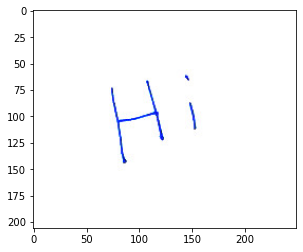

In [8]:
image = skimage.io.imread(fname=filename)
plt.figure()
plt.imshow(image)

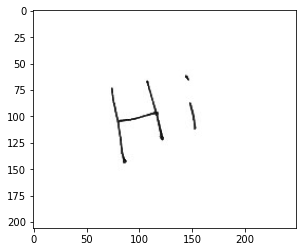

In [9]:
gray = skimage.color.rgb2gray(image)
plt.figure()
plt.imshow(gray,cmap=cm.gray)

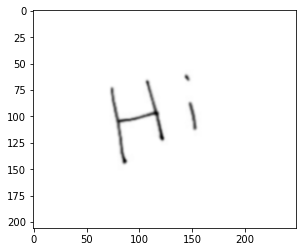

In [10]:
blur = skimage.filters.gaussian(gray, sigma=sigma)
plt.imshow(blur,cmap=cm.gray)

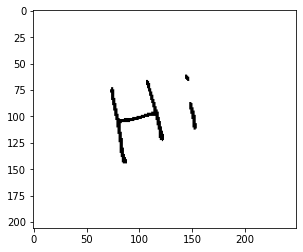

In [11]:
t = skimage.filters.threshold_otsu(blur)
mask = (blur > t)
plt.figure()
plt.imshow(mask,cmap=cm.gray)

In [12]:
result = skimage.measure.find_contours(mask)
result

[array([[ 66. , 147.5],
        [ 65. , 147.5],
        [ 64. , 147.5],
        [ 63. , 147.5],
        [ 62.5, 147. ],
        [ 62. , 146.5],
        [ 61.5, 146. ],
        [ 61. , 145.5],
        [ 60.5, 145. ],
        [ 60.5, 144. ],
        [ 61. , 143.5],
        [ 62. , 143.5],
        [ 63. , 143.5],
        [ 64. , 143.5],
        [ 64.5, 144. ],
        [ 65. , 144.5],
        [ 65.5, 145. ],
        [ 66. , 145.5],
        [ 66.5, 146. ],
        [ 66.5, 147. ],
        [ 66. , 147.5]]),
 array([[144. ,  88.5],
        [143. ,  88.5],
        [142. ,  88.5],
        [141. ,  88.5],
        [140.5,  88. ],
        [140. ,  87.5],
        [139. ,  87.5],
        [138.5,  87. ],
        [138. ,  86.5],
        [137. ,  86.5],
        [136. ,  86.5],
        [135.5,  86. ],
        [135. ,  85.5],
        [134. ,  85.5],
        [133. ,  85.5],
        [132. ,  85.5],
        [131. ,  85.5],
        [130. ,  85.5],
        [129.5,  85. ],
        [129. ,  84.5],
        [128. 

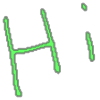

In [13]:
polys = [Layer(sg.Polygon(item)) for item in result]
l = Layer()
for item in polys:
    l^=item
l= l.rotate(-90)
l

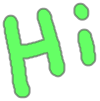

In [14]:
l<<=5
l

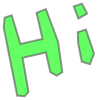

In [15]:
l = l.simplify(3)
l

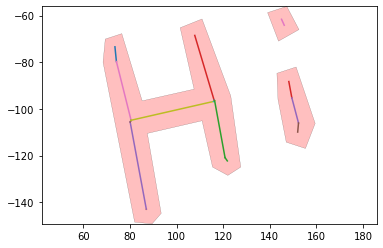

In [16]:
l.plot(new=True)
ls = [Layer(item) for item in l.geoms]

for item in ls:
    skeleton = ps.skeleton_as_subtree_list(item.exteriors()[0][::-1], item.interiors())
    all_sources = [item.source for item in skeleton]
    all_sinks = [item2 for item in skeleton for item2 in item.sinks]
    non_terminal_sinks = [item for item in all_sinks if item in all_sources]
    
    for arc in skeleton:
        for sink in arc.sinks:
            if sink in non_terminal_sinks:
                plt.plot((arc.source.x, sink.x),(arc.source.y, sink.y))
